In [412]:
import pandas as pd
import numpy as np

In [413]:
data = pd.read_csv("lessVPN.csv")
data.head()

,total_fpackets,total_fvolume,max_fpktl,max_bpktl,duration,fpsh_cnt,total_fhlen,label
0,13,1667,610,2878,24849,3,272,1
1,7,1308,611,2878,418395,3,152,1
2,7,1308,611,2878,418394,3,152,1
3,10,1801,686,2878,145784,3,212,1
4,3,712,586,66,245350,1,72,1


In [414]:
print(data['label'].unique())


[1 0]


In [415]:
data.describe(include = 'all')

,total_fpackets,total_fvolume,max_fpktl,max_bpktl,duration,fpsh_cnt,total_fhlen,label
count,1067.000000,1.067000e+03,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.00000
mean,67.153702,2.395742e+04,1261.571696,3512.642924,437358.042174,32.601687,1397.791940,0.47329
std,513.947834,1.526863e+05,2133.994622,4677.415747,269498.983154,297.188053,10543.473786,0.49952
min,1.000000,6.600000e+01,66.000000,0.000000,0.000000,0.000000,32.000000,0.00000
25%,8.000000,1.206500e+03,571.000000,1466.000000,215428.000000,2.000000,172.000000,0.00000
50%,11.000000,1.554000e+03,613.000000,2878.000000,405574.000000,3.000000,232.000000,0.00000
75%,19.000000,3.467500e+03,1159.000000,4290.000000,633789.000000,6.000000,392.000000,1.00000
max,14917.000000,2.976688e+06,16998.000000,57946.000000,999584.000000,8613.000000,304668.000000,1.00000


In [416]:
data.shape

(1067, 8)

In [417]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [418]:
X = data.drop('label', axis=1)
y = data['label']

In [419]:
print(X)

      total_fpackets  total_fvolume  max_fpktl  ...  duration  fpsh_cnt  total_fhlen
0                 13           1667        610  ...     24849         3          272
1                  7           1308        611  ...    418395         3          152
2                  7           1308        611  ...    418394         3          152
3                 10           1801        686  ...    145784         3          212
4                  3            712        586  ...    245350         1           72
...              ...            ...        ...  ...       ...       ...          ...
1062               7           1097        657  ...    649184         2          152
1063              11           4602       1880  ...    290650         4          232
1064              14           1399        571  ...    865215         1          376
1065              45         163371      16752  ...    492864        17          912
1066              16           1551        571  ...    727017    

In [420]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size=0.3)
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)
print(X_trainscaled)

[[-0.10537559 -0.14902044 -0.48243737 ... -0.68615227 -0.09830049
  -0.10593181]
 [-0.10705929 -0.14727775 -0.30894681 ...  1.3302353  -0.09830049
  -0.10757724]
 [-0.1020082  -0.14788166 -0.44515841 ... -0.57230075 -0.09830049
  -0.10264095]
 ...
 [ 0.2128434   0.05243587  0.10924668 ... -1.21904995  0.12283038
   0.20505471]
 [-0.0969571  -0.14321722 -0.30273365 ... -0.32537977 -0.09255683
  -0.09770465]
 [-0.0986408  -0.14494266 -0.27979275 ... -0.95573378 -0.09542866
  -0.09935008]]


In [421]:
clf = MLPClassifier(hidden_layer_sizes=(36),activation="relu",random_state=1,max_iter=10000).fit(X_trainscaled, y_train)
y_pred=clf.predict(X_testscaled)
print(clf.score(X_testscaled, y_test))

0.8068535825545171


In [422]:
y_pred

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,

In [423]:
from sklearn.metrics import classification_report,confusion_matrix

confusion_matrix(y_test,y_pred)

array([[141,  33],
       [ 29, 118]])

In [424]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.83      0.81      0.82       174
           1       0.78      0.80      0.79       147

    accuracy                           0.81       321
   macro avg       0.81      0.81      0.81       321
weighted avg       0.81      0.81      0.81       321



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


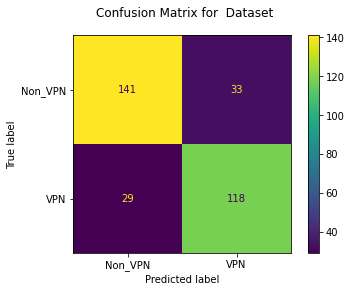

In [425]:
fig=plot_confusion_matrix(clf, X_testscaled, y_test,display_labels=["Non_VPN","VPN"])
fig.figure_.suptitle("Confusion Matrix for  Dataset")
plt.show()

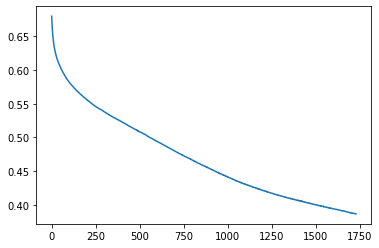

In [426]:
plt.plot(clf.loss_curve_)